In [79]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression as LR
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
mpl.style.use('ggplot') 

In [51]:
rdf = pd.read_csv('raw/Data-Collisions.csv')

In [52]:
rdf.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In this step, we should create a new dataframe with needed columns.

In [53]:
df = rdf[["SEVERITYCODE", "X","Y" , "PERSONCOUNT", "INCDTTM" ,"WEATHER" ,"ROADCOND" ,"LIGHTCOND" ,"UNDERINFL"]]
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,2,-122.323148,47.703140,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,2,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,0
2,1,-122.334540,47.607871,4,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,0
3,1,-122.334803,47.604803,3,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,0


## Data Wrangling

-   Handle missing values
-   Correct data format
-   Standardize and Normalize Data

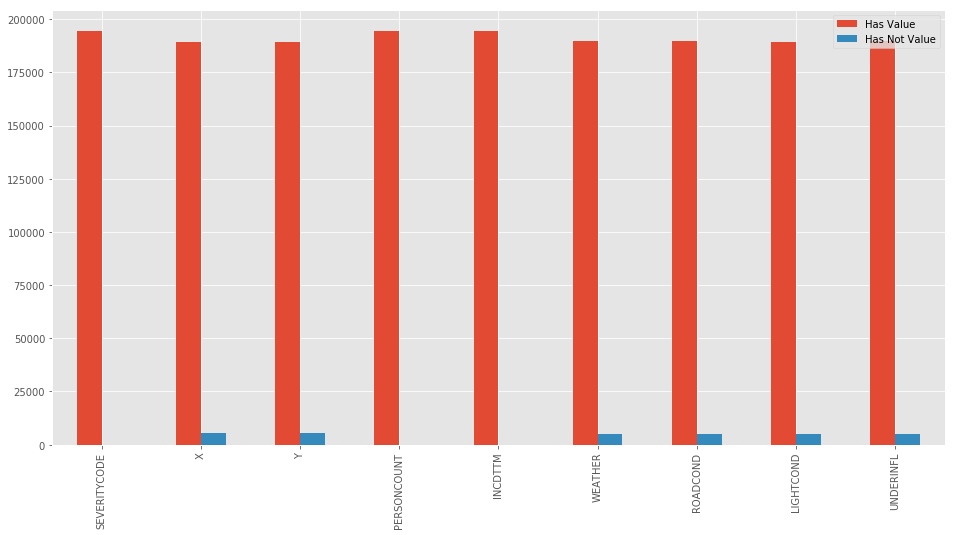

In [54]:
missing = df.isnull()

tf = []

for column in missing.columns.values.tolist():
    #print(column)
    #print (missing[column].value_counts())
    tf.append(missing[column].value_counts())
    
tdf=pd.DataFrame(tf)
tdf.replace(np.nan,0,inplace=True)
tdf.rename(columns={0:'Has Value',1:'Has Not Value'},inplace=True)

tdf.plot(kind='bar',figsize=(16, 8))
plt.savefig('Plot01.png')

### How to deal with missing data?

As the plot is showing, five columns have some null values. In these columns, the rate of null values is minimal. And also, these null values are placed in the critical parameters. So the best strategy is, delete rows that have a null value.

In [62]:
df.dropna(how='any', axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

missing = df.isnull()

tf = []

for column in missing.columns.values.tolist():
    #print(column)
    #print (missing[column].value_counts())
    tf.append(missing[column].value_counts())
df

,SEVERITYCODE,X,Y,PERSONCOUNT,INCDTTM,UNDERINFL,Weather_Code,Road_Code,Light_Code
0,2,-122.323148,47.703140,2,3/27/2013 2:54:00 PM,N,4,8,5
1,1,-122.347294,47.647172,2,12/20/2006 6:55:00 PM,0,6,8,2
2,1,-122.334540,47.607871,4,11/18/2004 10:20:00 AM,0,4,0,5
3,1,-122.334803,47.604803,3,3/29/2013 9:26:00 AM,N,1,0,5
4,2,-122.306426,47.545739,2,1/28/2004 8:04:00 AM,0,6,8,5
...,...,...,...,...,...,...,...,...,...
184162,2,-122.290826,47.565408,3,11/12/2018 8:12:00 AM,N,1,0,5
184163,1,-122.344526,47.690924,2,12/18/2018 9:14:00 AM,N,6,8,5
184164,2,-122.306689,47.683047,3,1/19/2019 9:25:00 AM,N,1,0,5
184165,2,-122.355317,47.678734,2,1/15/2019 4:48:00 PM,N,1,0,6


In [ ]:
lb = LabelEncoder()
"""
WeatherLabel = list(df["WEATHER"].unique())
df["Weather_Code"] = lb.fit_transform(df["WEATHER"])

RoadLabel = list(df["ROADCOND"].unique())
df["Road_Code"] = lb.fit_transform(df["ROADCOND"])

LightLabel = list(df["LIGHTCOND"].unique())
df["Light_Code"] = lb.fit_transform(df["LIGHTCOND"])

InflLabel = list(df["UNDERINFL"].unique())
df["UNDERINFL"].replace('N',0,inplace=True)
df["UNDERINFL"].replace('Y',1,inplace=True)
df["UNDERINFL"].replace('0',0,inplace=True)
df["UNDERINFL"].replace('1',1,inplace=True)

df.drop(["WEATHER","ROADCOND","LIGHTCOND"],axis=1,inplace=True)

df.rename(columns={"UNDERINFL":"INFL_Code"},inplace=True)
"""
listt = df["INCDTTM"].astype('datetime64[ns]').dt.dayofweek
print(listt)
df

